# **An√°lise de Carteira de Investimentos: Risco x Retorno (2020‚Äì2025)**

### **Introdu√ß√£o**

Este projeto analisa o desempenho de uma carteira composta por cinco ativos da bolsa brasileira entre 2020 e 2025.  
O objetivo √© avaliar o **risco** e o **retorno** de cada ativo, compreender a correla√ß√£o entre eles e, a partir desses dados, propor uma composi√ß√£o de portf√≥lio que maximize o **Sharpe Ratio**, equilibrando retorno esperado e volatilidade.  

As an√°lises incluem:  
- Evolu√ß√£o hist√≥rica dos pre√ßos ajustados dos ativos;  
- C√°lculo de retornos di√°rios e anuais;  
- Volatilidade e correla√ß√£o entre ativos;  
- Avalia√ß√£o de risco, retorno e Sharpe Ratio;  
- Simula√ß√£o de portf√≥lios e identifica√ß√£o do portf√≥lio √≥timo;  
- Conclus√µes sobre a diversifica√ß√£o e a melhor estrat√©gia de aloca√ß√£o.


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# lista de 5 ativos brasileiros que ser√£o analisados
ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BOVA11.SA', 'ABEV3.SA']

# baixa dados hist√≥ricos de 2020 a 2025
dados = yf.download(ativos, start="2020-01-01", end="2025-01-01", group_by='ticker')

# adj Close = pre√ßo de fechamento ajustado para dividendos e splits
adj_close = pd.DataFrame()
for ativo in ativos:
    adj_close[ativo] = dados[ativo]['Close']

print("Pre√ßos Ajustados:")
print(adj_close.head())

C:\Users\domingos.alves\AppData\Local\Temp\ipykernel_29928\906662219.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(ativos, start="2020-01-01", end="2025-01-01", group_by='ticker')
[*********************100%***********************]  5 of 5 completed

Pre√ßos Ajustados:
            PETR4.SA   VALE3.SA   ITUB4.SA   BOVA11.SA   ABEV3.SA
Date                                                             
2020-01-02  9.094494  31.718037  25.957470  114.239998  14.897882
2020-01-03  9.020436  31.484509  25.684450  113.800003  14.688381
2020-01-06  9.127079  31.297689  25.302210  112.589996  14.758214
2020-01-07  9.091532  31.525373  24.715225  112.239998  14.789252
2020-01-08  9.035248  31.531214  24.312511  111.949997  14.719417


## **C√°lculo dos retornos di√°rios e anuais**

In [10]:
# calcula a varia√ß√£o percentual di√°ria de cada ativo
retornos_diarios = adj_close.pct_change().dropna()
print("\nRetornos Di√°rios: ")
print(retornos_diarios.head())

# retornos Anuais M√©dios, considerando ~252 dias √∫teis por ano 
retornos_anuais = (1 + retornos_diarios.mean())**252 - 1
print("\nRetornos Anuais M√©dios:")
print(retornos_anuais)

# retornos Anuais por Ano
adj_close['Ano'] = adj_close.index.year

# calcula o retorno de cada ativo em cada ano
retornos_anuais_por_ano = adj_close.groupby('Ano').apply(
    lambda x: x.drop(columns='Ano').iloc[-1] / x.drop(columns='Ano').iloc[0] - 1
)

# mostrar retornos anuais de cada ativo por ano
print("\nRetornos Anuais por Ano:")
print(retornos_anuais_por_ano)

# Garantir que s√≥ fiquem os ativos (sem a coluna "Ano")
if "Ano" in adj_close.columns:
    adj_close = adj_close.drop(columns=["Ano"])



Retornos Di√°rios: 
            PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
Date                                                         
2020-01-03 -0.008143 -0.007363 -0.010518  -0.003851 -0.014062
2020-01-06  0.011822 -0.005934 -0.014882  -0.010633  0.004754
2020-01-07 -0.003895  0.007275 -0.023199  -0.003109  0.002103
2020-01-08 -0.006191  0.000185 -0.016294  -0.002584 -0.004722
2020-01-09 -0.003279 -0.013146 -0.019933  -0.002590 -0.007907

Retornos Anuais M√©dios:
PETR4.SA     0.443363
VALE3.SA     0.179252
ITUB4.SA     0.053796
BOVA11.SA    0.040394
ABEV3.SA    -0.008996
dtype: float64

Retornos Anuais por Ano:
      PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
Ano                                                    
2020 -0.076854  0.676893 -0.147200   0.011467 -0.163344
2021  0.210751  0.002747 -0.298177  -0.116487  0.039932
2022  0.349021  0.248862  0.208455   0.060242 -0.002932
2023  1.103789 -0.062826  0.451683   0.270486  0.018158
2024  0.173838 -0.226486 -0.0168

C:\Users\domingos.alves\AppData\Local\Temp\ipykernel_29928\1709393111.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  retornos_anuais_por_ano = adj_close.groupby('Ano').apply(


## **Visualiza√ß√£o**

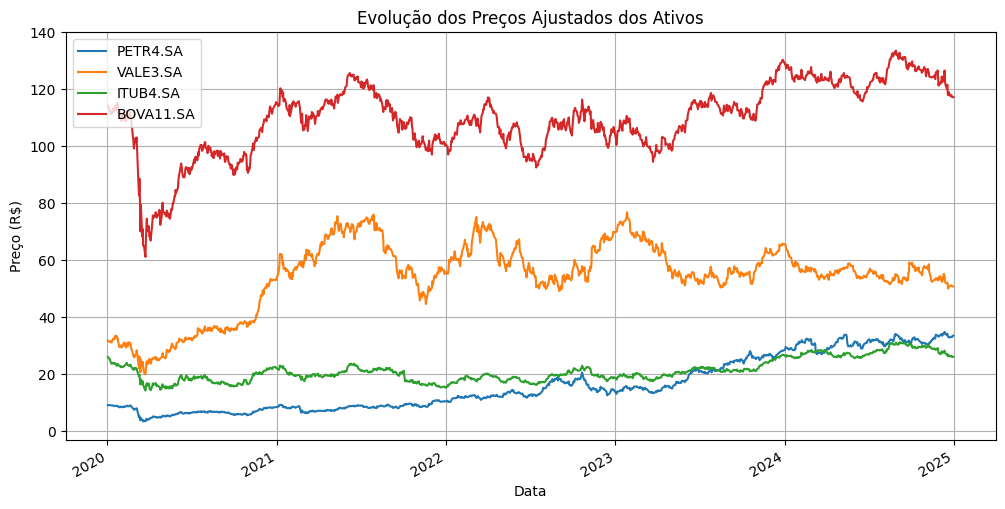

In [11]:
adj_close.iloc[:, :-1].plot(figsize=(12,6), title="Evolu√ß√£o dos Pre√ßos Ajustados dos Ativos")
plt.xlabel("Data")
plt.ylabel("Pre√ßo (R$)")
plt.grid(True)
plt.show()

# A seguir √© poss√≠vel visualizar a evolua√ß√£o hist√≥rica dos ativos ao longo dos 5 anos
# Pode-se observar que os ativos da BOVA11 e da VALE3 foram os que sofreram maior varia√ß√£o em rela√ß√£o aos outros

### Retornos Anuais por Ano

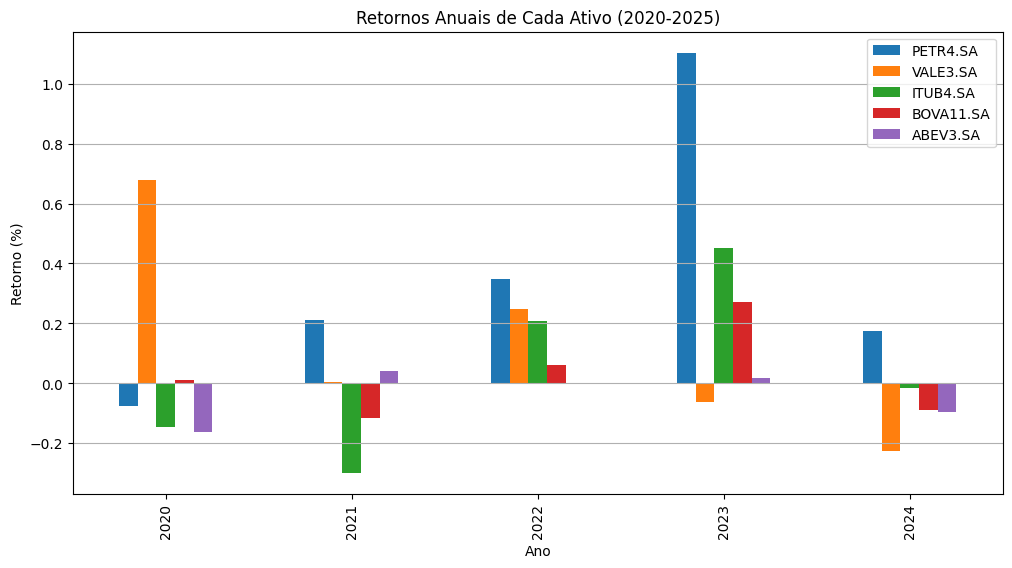

In [12]:
retornos_anuais_por_ano.plot(kind='bar', figsize=(12,6))
plt.title("Retornos Anuais de Cada Ativo (2020-2025)")
plt.ylabel("Retorno (%)")
plt.xlabel("Ano")
plt.grid(axis='y')
plt.show()

# A seguir, visualiza-se os retornos anuais de cada ativo de 2020 a 2024.
# Cada barra representa o retorno total do ano para o ativo correspondente.
# Permite identificar anos de alta ou baixa performance, por exemplo, uma maior varia√ß√£o entre ativos em 2023.

## **Volatilidade e Risco da Carteira**

Quest√µes a serem respondidas:

* Qual √© a volatilidade (risco) de cada ativo individualmente? <br>
    Permite medir quanto os pre√ßos variam em torno da m√©dia, ou seja, o risco de cada ativo.
    
* Como os ativos se relacionam entre si? <br>
    A correla√ß√£o mostra se os ativos tendem a subir e cair juntos, ajudando a montar uma carteira diversificada.

### Volatilidade Di√°ria e Anualizada

In [13]:
vol_diaria = retornos_diarios.std()
print("Volatilidade Di√°ria (%):")
print(vol_diaria * 100)

# Volatilidade anualizada (~252 dias √∫teis por ano)
vol_anual = vol_diaria * (252 ** 0.5)
print("\nVolatilidade Anualizada (%):")
print(vol_anual * 100)

Volatilidade Di√°ria (%):
PETR4.SA     2.809020
VALE3.SA     2.366006
ITUB4.SA     2.019312
BOVA11.SA    1.639646
ABEV3.SA     1.886853
dtype: float64

Volatilidade Anualizada (%):
PETR4.SA     44.591808
VALE3.SA     37.559186
ITUB4.SA     32.055579
BOVA11.SA    26.028575
ABEV3.SA     29.952870
dtype: float64


### Correla√ß√£o entre ativos

In [14]:
# Valores pr√≥ximos de 1 ‚Üí ativos se movem juntos.
# Valores pr√≥ximos de 0 ‚Üí movimentos independentes.
# Valores negativos ‚Üí movimentos opostos.

# Matriz de correla√ß√£o di√°ria
correlacao = retornos_diarios.corr()
print("\nCorrela√ß√£o entre Ativos:")
print(correlacao)


Correla√ß√£o entre Ativos:
           PETR4.SA  VALE3.SA  ITUB4.SA  BOVA11.SA  ABEV3.SA
PETR4.SA   1.000000  0.470765  0.506056   0.728504  0.378691
VALE3.SA   0.470765  1.000000  0.366489   0.631489  0.232674
ITUB4.SA   0.506056  0.366489  1.000000   0.749344  0.510285
BOVA11.SA  0.728504  0.631489  0.749344   1.000000  0.593847
ABEV3.SA   0.378691  0.232674  0.510285   0.593847  1.000000


## **Risco e Retorno (Volatilidade e Sharpe Ratio)**

Quest√µes a serem respondidas:

* Qual foi o retorno m√©dio anual de cada ativo no per√≠odo analisado?

* Qual foi a volatilidade (risco) anual de cada ativo?

* Qual ativo apresentou a melhor rela√ß√£o risco-retorno, medida pelo √çndice de Sharpe?

In [15]:
import numpy as np

# Retornos di√°rios (j√° temos do passo anterior, mas recalculamos para clareza)
retornos = adj_close.pct_change().dropna()

# Volatilidade (risco) anualizada
volatilidade_anual = retornos.std() * np.sqrt(252)

# Retorno m√©dio anualizado
retorno_medio_anual = retornos.mean() * 252

# Sharpe Ratio (assumindo taxa livre de risco = 0)
sharpe_ratio = retorno_medio_anual / volatilidade_anual

# Mostrar resultados
print("üìä Risco e Retorno dos Ativos (2020-2025):")
print(pd.DataFrame({
    "Retorno M√©dio Anual (%)": retorno_medio_anual * 100,
    "Volatilidade Anual (%)": volatilidade_anual * 100,
    "Sharpe Ratio": sharpe_ratio
}).round(2))


üìä Risco e Retorno dos Ativos (2020-2025):
           Retorno M√©dio Anual (%)  Volatilidade Anual (%)  Sharpe Ratio
PETR4.SA                     36.72                   44.59          0.82
VALE3.SA                     16.49                   37.56          0.44
ITUB4.SA                      5.24                   32.06          0.16
BOVA11.SA                     3.96                   26.03          0.15
ABEV3.SA                     -0.90                   29.95         -0.03


#### **Interpreta√ß√£o dos resultados (2020‚Äì2025):**

**PETR4.SA (Petrobras) ‚Üí**
Maior retorno m√©dio (36,7% ao ano), mas tamb√©m com a maior volatilidade (44,6%). Sharpe Ratio de 0,82, mostrando um risco elevado, mas ainda com boa compensa√ß√£o.

**VALE3.SA (Vale) ‚Üí**
Retorno m√©dio de 16,5% e volatilidade de 37,6%. Sharpe Ratio 0,44, ou seja, retorno razo√°vel, mas ainda arriscado.

**ITUB4.SA (Ita√∫) ‚Üí**
Mais conservadora: retorno m√©dio baixo (5,2%), risco moderado (32%), Sharpe bem baixo (0,16).

**BOVA11.SA (ETF que replica o Ibovespa) ‚Üí**
Quase neutro: retorno m√©dio de 3,9%, risco mais baixo (26%), mas Sharpe Ratio tamb√©m pequeno (0,15). Representa bem o mercado.

**ABEV3.SA (Ambev) ‚Üí**
√önica com retorno m√©dio negativo (-0,9%), Sharpe -0,03, ou seja, n√£o compensou o risco.

## **Simula√ß√£o de Portf√≥lios**

Quest√µes a serem respondidas:

* Como diferentes combina√ß√µes de ativos impactam risco e retorno?

* Existe uma fronteira eficiente que mostra as melhores combina√ß√µes poss√≠veis?

* Qual √© a composi√ß√£o do portf√≥lio √≥timo, ou seja, o que maximiza o Sharpe Ratio?

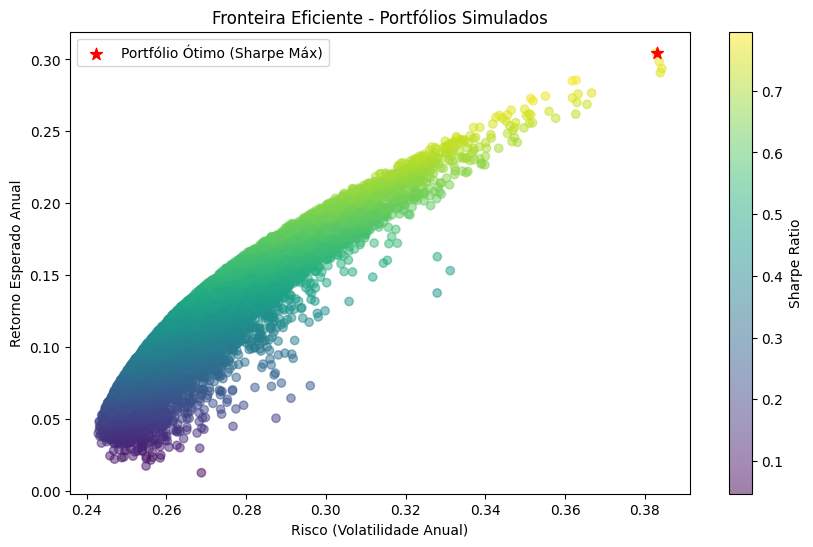

Portf√≥lio √ìtimo (Sharpe M√°x):
PETR4.SA: 76.78%
VALE3.SA: 13.04%
ITUB4.SA: 1.92%
BOVA11.SA: 1.96%
ABEV3.SA: 6.31%

Retorno esperado: 30.47%
Risco esperado: 38.29%
Sharpe Ratio: 0.80


In [16]:
# Calcular retornos di√°rios
retornos_diarios = adj_close.pct_change().dropna()

# Retorno m√©dio anual de cada ativo
retorno_medio = retornos_diarios.mean() * 252

# Matriz de covari√¢ncia anualizada
cov_matriz = retornos_diarios.cov() * 252

# Simula√ß√£o de 20.000 portf√≥lios aleat√≥rios
n_portfolios = 20000
np.random.seed(42)

resultados = np.zeros((3, n_portfolios))
pesos_lista = []

for i in range(n_portfolios):
    pesos = np.random.random(len(ativos))
    pesos /= np.sum(pesos)  # garantir que somem 100%
    pesos_lista.append(pesos)

    retorno = np.dot(pesos, retorno_medio)
    risco = np.sqrt(np.dot(pesos.T, np.dot(cov_matriz, pesos)))
    sharpe = retorno / risco

    resultados[0, i] = retorno
    resultados[1, i] = risco
    resultados[2, i] = sharpe

# Identificar portf√≥lio com maior Sharpe
max_sharpe_idx = np.argmax(resultados[2])
retorno_max_sharpe = resultados[0, max_sharpe_idx]
risco_max_sharpe = resultados[1, max_sharpe_idx]
pesos_max_sharpe = pesos_lista[max_sharpe_idx]

# Plotar Fronteira Eficiente
plt.figure(figsize=(10, 6))
plt.scatter(resultados[1, :], resultados[0, :], c=resultados[2, :], cmap='viridis', alpha=0.5)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(risco_max_sharpe, retorno_max_sharpe, c='red', s=80, marker='*', label="Portf√≥lio √ìtimo (Sharpe M√°x)")
plt.xlabel("Risco (Volatilidade Anual)")
plt.ylabel("Retorno Esperado Anual")
plt.title("Fronteira Eficiente - Portf√≥lios Simulados")
plt.legend()
plt.show()

# Exibir composi√ß√£o do portf√≥lio √≥timo
print("Portf√≥lio √ìtimo (Sharpe M√°x):")
for ativo, peso in zip(ativos, pesos_max_sharpe):
    print(f"{ativo}: {peso:.2%}")

print(f"\nRetorno esperado: {retorno_max_sharpe:.2%}")
print(f"Risco esperado: {risco_max_sharpe:.2%}")
print(f"Sharpe Ratio: {resultados[2, max_sharpe_idx]:.2f}")


### **Interpreta√ß√£o dos Resultados ‚Äì Portf√≥lio √ìtimo**

**M√©tricas do Portf√≥lio √ìtimo**

- **Retorno esperado:** `30.47%`
- **Risco (volatilidade):** `38.29%`
- **√çndice de Sharpe:** `0.80`

1. **Predomin√¢ncia da PETR4.SA:**  
   O ativo PETR4.SA (Petrobras) aparece como o mais relevante no portf√≥lio, com mais de **75% da aloca√ß√£o**, indicando que suas caracter√≠sticas hist√≥ricas de risco e retorno contribu√≠ram significativamente para o resultado.

2. **Diversifica√ß√£o moderada:**  
   Embora haja diversifica√ß√£o com outros ativos (VALE3, ITUB4, BOVA11 e ABEV3), a concentra√ß√£o ainda √© elevada em um √∫nico ativo, o que pode aumentar a exposi√ß√£o a riscos espec√≠ficos do setor de energia/petr√≥leo.

3. **Sharpe Ratio de 0.80:**  
   Um √≠ndice de Sharpe pr√≥ximo de **1.0** √© considerado razo√°vel, mostrando que o portf√≥lio oferece uma rela√ß√£o relativamente boa entre risco e retorno.  
   Por√©m, n√£o est√° em n√≠veis excelentes (>1.5), o que sugere que ainda h√° espa√ßo para melhorias.

4. **Risco elevado:**  
   A volatilidade do portf√≥lio √© de **38.29%**, um valor bastante alto, o que indica fortes oscila√ß√µes nos retornos esperados. Investidores mais conservadores poderiam considerar ajustes para reduzir esse risco.


**Conclus√£o:**  
O portf√≥lio √≥timo obtido privilegia ativos de maior retorno esperado, ainda que concentre bastante risco em **PETR4.SA**. A interpreta√ß√£o dos resultados refor√ßa a import√¢ncia da diversifica√ß√£o e do alinhamento do portf√≥lio ao perfil de risco do investidor.


## **Conclus√£o Final** 

O portf√≥lio √≥timo simulado, com base nos dados de 2020 a 2025, indica que PETR4.SA deve compor a maior parte do investimento, seguido por VALE3.SA e ABEV3.SA em propor√ß√µes menores.  

Essa distribui√ß√£o maximiza o retorno esperado em rela√ß√£o ao risco (Sharpe Ratio), aproveitando a diversifica√ß√£o entre os ativos. Apesar de ainda existir volatilidade significativa, o portf√≥lio obt√©m o melhor equil√≠brio hist√≥rico entre risco e retorno poss√≠vel dentro das op√ß√µes analisadas.  

Diante de toda a an√°lise, fica evidente a import√¢ncia da diversifica√ß√£o: mesmo com maior concentra√ß√£o em um ativo dominante, a presen√ßa de outros ativos ajuda a reduzir parcialmente o risco total da carteira.
